In [5]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import pickle
import MDAnalysis
from MDAnalysis.analysis import rdf
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/var/folders/gk/bdqkskqj2fv8dk9kgrxm5psh0000gn/T/ipykernel_78392/2540733804.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


In [6]:
def extract_form_log(fn):
    lines=open(fn,'r').readlines()
    start=np.where([('Step' in l) for l in lines])[-1][0]
    data={keyi.lower(): []  for keyi in lines[start].split()}
    for l in lines[start+1:]:
        ls=l.split()
        try:
            if ls[0].isdigit():
                for i, key in enumerate(data.keys()):
                    data[key].append(float(ls[i]))
        
            else:
                break
        except:
            break
    for key in data.keys():
        data[key]=np.array(data[key])
    return data

In [7]:
sims=dict()
for f in glob.glob('*_*/log.lammps'):
    try:
        sims[f.replace('/log.lammps','')]=extract_form_log(f)
    except:
        pass

with open('1-bulk.pickle', 'wb') as handle:
    pickle.dump(sims, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('1-bulk.pickle', 'rb') as handle:
    sims = pickle.load(handle)
print(sims.keys())

dict_keys(['IceVI_10000bar', 'IceVI_9000bar', 'IceVI_12000bar', 'IceVI_8000bar', 'Liquid_10000bar', 'Liquid_9000bar', 'Liquid_12000bar', 'Liquid_8000bar'])


### Volume for different pressures

250
[[10000.          7010.38546391]
 [ 9000.          7092.94183888]
 [12000.          6855.84205526]
 [ 8000.          7183.90064874]]


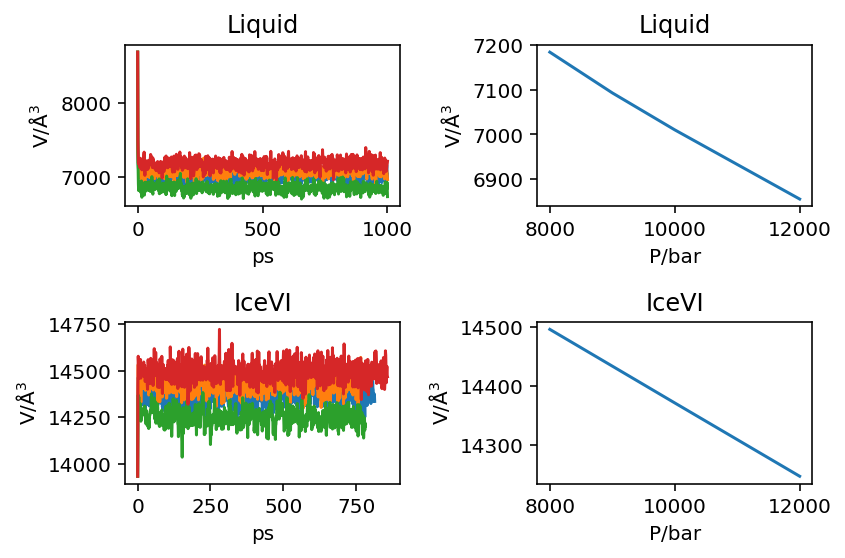

In [8]:
NIGNORE=int(250/(2./1000)/(500))
print(NIGNORE)
plt.subplot(221)
plt.title('Liquid')
vol_liquid=[]
for key in sims.keys():
    p=float(key.replace('Liquid_','').replace('IceVI_','').replace('bar',''))
    if 'Liquid' in key:
        sim=sims[key]
        vol_liquid.append([p,np.mean(sim['volume'][NIGNORE:])])
        try:
            plt.plot(sim['step']*2/1000,sim['volume'],label=key)
        except:
            pass
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')
#plt.xlim([0,100])
plt.subplot(222)
plt.title('Liquid')
vol_liquid=np.array(vol_liquid)
print(vol_liquid)
vol_liquid=vol_liquid[np.argsort(vol_liquid[:,0])]
plt.plot(vol_liquid[:,0],vol_liquid[:,1])
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'P/bar')

plt.subplot(223)
plt.title('IceVI')
vol_ice=[]
for key in sims.keys():
    p=float(key.replace('Liquid_','').replace('IceVI_','').replace('bar',''))
    if 'IceVI' in key:
        sim=sims[key]
        vol_ice.append([p,np.mean(sim['volume'][NIGNORE:])])
        try:
            plt.plot(sim['step']*2/1000,sim['volume'],label=key)
        except:
            pass
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')
#plt.xlim([0,100])
plt.subplot(224)
plt.title('IceVI')
vol_ice=np.array(vol_ice)
vol_ice=vol_ice[np.argsort(vol_ice[:,0])]
plt.plot(vol_ice[:,0],vol_ice[:,1])
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'P/bar')

plt.tight_layout()

### Box sides for different pressures

In [9]:
sim.keys()

dict_keys(['step', 'temp', 'poteng', 'toteng', 'e_pair', 'e_mol', 'press', 'lx', 'ly', 'lz', 'xy', 'xz', 'yz', 'volume', 'pxx', 'pyy', 'pzz', 'pxy', 'pxz', 'pyz'])

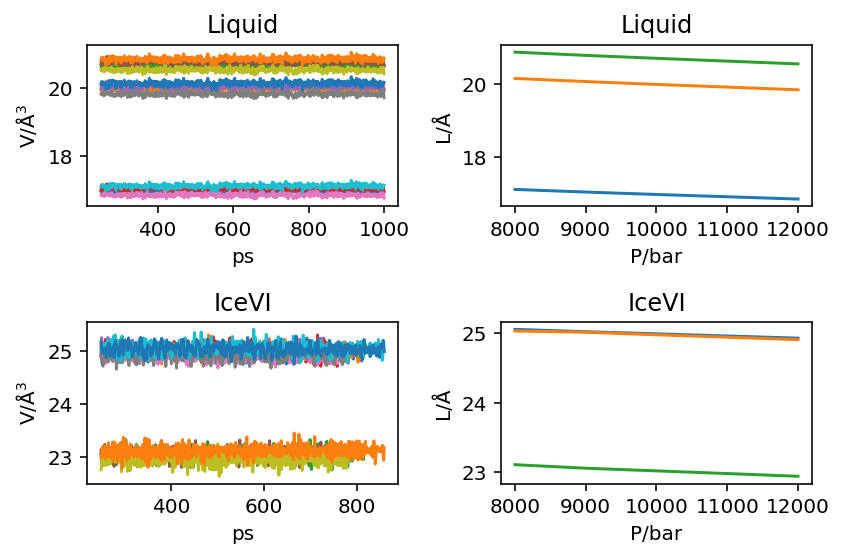

In [10]:
#NIGNORE=0
plt.subplot(221)
plt.title('Liquid')
box_liquid=[]
for key in sims.keys():
    p=float(key.replace('Liquid_','').replace('IceVI_','').replace('bar',''))
    if 'Liquid' in key:
        sim=sims[key]
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['lx'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['ly'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['lz'][NIGNORE:])

        box_liquid.append([p,np.mean(sim['lx'][NIGNORE:]),
                         np.mean(sim['ly'][NIGNORE:]),
                         np.mean(sim['lz'][NIGNORE:])])
                       
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')

plt.subplot(222)
plt.title('Liquid')
box_liquid=np.array(box_liquid)
box_liquid=box_liquid[np.argsort(box_liquid[:,0])]
plt.plot(box_liquid[:,0],box_liquid[:,1:4])
plt.ylabel(r'L/Å')
plt.xlabel(r'P/bar')


plt.subplot(223)
plt.title('IceVI')
box_IceVI=[]
for key in sims.keys():
    p=float(key.replace('Liquid_','').replace('IceVI_','').replace('bar',''))
    if 'IceVI' in key:
        sim=sims[key]
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['lx'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['ly'][NIGNORE:])
        plt.plot(sim['step'][NIGNORE:]*2/1000,sim['lz'][NIGNORE:])

        box_IceVI.append([p,np.mean(sim['lx'][NIGNORE:]),
                         np.mean(sim['ly'][NIGNORE:]),
                         np.mean(sim['lz'][NIGNORE:]),
                         np.mean(sim['xy'][NIGNORE:]),
                         np.mean(sim['xz'][NIGNORE:]),
                         np.mean(sim['yz'][NIGNORE:])])
plt.ylabel(r'V/Å$^3$')
plt.xlabel(r'ps')

plt.subplot(224)
plt.title('IceVI')
box_IceVI=np.array(box_IceVI)
box_IceVI=box_IceVI[np.argsort(box_IceVI[:,0])]
plt.plot(box_IceVI[:,0],box_IceVI[:,1:4])
plt.ylabel(r'L/Å')
plt.xlabel(r'P/bar')

plt.tight_layout()


In [15]:
print('Liquid')
for val in box_liquid:
    print('Pressure: ',val[0],'bar, lx:',val[1],'Å, ly:',val[2],'Å, lz:',val[3],'Å')
print()
print('IceIh')
for val in box_IceVI:
    print('Pressure: ',val[0],'bar, lx:',val[1],'Å, ly:',val[2],'Å, lz:',val[3],'Å')        

Liquid
Pressure:  8000.0 bar, lx: 17.098760207723036 Å, ly: 20.140080946737683 Å, lz: 20.860447525965377 Å
Pressure:  9000.0 bar, lx: 17.026293972037283 Å, ly: 20.054725308921437 Å, lz: 20.772038872170437 Å
Pressure:  10000.0 bar, lx: 16.95999898135819 Å, ly: 19.97663858455393 Å, lz: 20.69115915446072 Å
Pressure:  12000.0 bar, lx: 16.83444813981358 Å, ly: 19.828756282290282 Å, lz: 20.537987432756324 Å

IceIh
Pressure:  8000.0 bar, lx: 25.05731536945813 Å, ly: 25.03390942364532 Å, lz: 23.109320543513956 Å
Pressure:  9000.0 bar, lx: 25.023122042226486 Å, ly: 25.01532713243762 Å, lz: 23.0585550537428 Å
Pressure:  10000.0 bar, lx: 24.992926375221238 Å, ly: 24.978824982300882 Å, lz: 23.020335962831858 Å
Pressure:  12000.0 bar, lx: 24.930084778611633 Å, ly: 24.909248146341465 Å, lz: 22.942868652908068 Å


In [16]:
with open('avg_IceVI_box.dat','w') as fp_out:
    for val in box_IceVI:
        fp_out.write('{:8}{:10.5}{:10.5}{:10.5}{:10.5}{:10.5}{:10.5}\n'.format(val[0],val[1],val[2],val[3],val[4],val[5],val[6]))
!cat avg_IceVI_box.dat

  8000.0    25.057    25.034    23.109 -0.052675 -0.095531 -0.022366
  9000.0    25.023    25.015    23.059 -0.051213 -0.086401 -0.011039
 10000.0    24.993    24.979     23.02 -0.056497 -0.080426 -0.023823
 12000.0     24.93    24.909    22.943 -0.041526 -0.083396 -0.021523


## Plot of radial distributions for all simulations

In [13]:
sims_result=dict()
dr=0.05
start=500

for key in sims.keys():
    sims_result[key]=dict()
    try:
        u = MDAnalysis.Universe(key+"/water.data", key+"/dump.dcd", format="LAMMPS")
    except:
         u = MDAnalysis.Universe(key+"/iceVI.data", key+"/dump.dcd", format="LAMMPS")
    u.pbc=True
    atoms=u.select_atoms("type 2")
    RDF=rdf.InterRDF(atoms,atoms,range=(1.-.5*dr,11.+0.5*dr),nbins=1+int(10./dr)).run(start=start)
    sims_result[key]['rdf']=RDF

(0.0, 8.0)

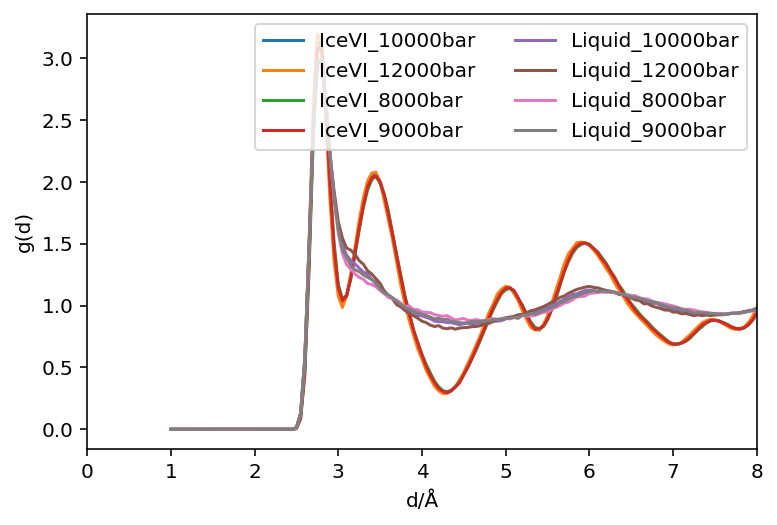

In [14]:
for key in sorted(sims_result.keys()):
    plt.plot(sims_result[key]['rdf'].results.bins,sims_result[key]['rdf'].results.rdf,label=key)
#data=np.loadtxt('rdf_rigid_1atm_300K.dat')
#plt.plot(data[:,0],data[:,1],label='ref 300K')
plt.xlabel('d/Å')
plt.ylabel('g(d)')
plt.legend(ncol=2)
plt.xlim([0,8])